## Practical Machine Learning
### Assignment 6 - Neural Networks

Description:
This individual assignment involves fitting a neural network to the MNIST data, testing alternative network structures, activation functions, optimization methods, and/or hyperparameter settings. As in Assignment 5, we will assess classification performance accuracy and processing time. Python TensorFlow should be used for Assignment 6. (If you experience difficulty installing TensorFlow, Python scikit-learn may be used as an alternative for Assignment 6.)

The Benchmark Experiment
Tested neural network structures should be explored within a benchmark experiment, a factorial design with at least two levels on each of two experimental factors (at least a 2x2 completely crossed design). But due to the time required to fit each neural network, we will observe only one trial for each cell in the design. Also, we will be using a simple training-and-test split with the split having been performed previously. That is, we use the training and test sets that come with MNIST.

An example experiment could include two values for the number of nodes per inner layer and two values for the number of inner layers. Various machine learning hyperparameter settings may be used.

Students are encouraged to work in STUDY TEAMS on this assignment, with the understanding that each student must run the code himself/herself and write an independent report of the experimental results. 

An example of the results from this assignment should be provided in a table such as the following:
Image added to the assignment section within Canvas.

In summary, this assignment asks you to fit a number of neural networks, comparing processing time and performance across experimental treatments.

Management Question
Suppose you are a financial institution evaluating machine learning technologies for optical character recognition. Initial testing is on the MNIST digits. What can you conclude from your benchmark study? Which neural network typology and hyperparameter settings would you recommend as being the most trustworthy?

Programming Resources
Géron, A. (2017). Hands-on machine learning with Scikit-Learn & TensorFlow: Concepts, tools, and techniques to build intelligent systems. Sebastopol, CA: O’Reilly. [ISBN-13 978-1-491-96229-9]. Chapter 11: Training Deep Neural Networks (pp. 275–312). Chapter 11 code (a Jupyter Notebook file 11_deep_learning.ipynb) shows how to use TensorFlow with the MNIST data set:
Source code available at via Github


##### Extensive coding examples are provided under:
Modules 6 / Additional Resources 

For students wanting to compare TensorFlow with scikit-learn or other systems for building neural networks, it is good to have common input data. See the programs under:
Modules 6 / Additional Resources / Jump-Start MNIST Data Prep

For a demonstration of scikit-learn fitting of neural networks, a demonstration is shown under:
Modules 6 / Additional Resources / Jump-Start MNIST Scikit-Learn Neural Networks


TensorFlow documentation and tutorials are available online at
https://www.tensorflow.org/api_docs/python 
https://www.tensorflow.org/tutorials/index.html

Visualization of TensorFlow work is provided through TensorBoard, with documentation at
https://www.tensorflow.org/get_started/summaries_and_tensorboard 
https://www.tensorflow.org/get_started/graph_viz 

For tutorials from the TensorFlow Developers Summit 2017
https://www.youtube.com/playlist?list=PLOU2XLYxmsIKGc_NBoIhTn2Qhraji53cv 

There is also a Lynda.com course introducing TensorFlow. See the reference under Modules / Technology Resources.

Background information on neural network structure and parameter estimation and the mathematics of optimization (backpropagation) may be found at:
https://www.youtube.com/watch?v=aircAruvnKk 


An advanced Google presentation from the TensorFlow Developers Summit 2017 demonstrates the wide range of possibilities available through TensorBoard:
https://www.youtube.com/watch?v=eBbEDRsCmv4&list=PLOU2XLYxmsIKGc_NBoIhTn2Qhraji53cv&index=5


Grading Guidelines (50 points)
(1) Data preparation, exploration, visualization (10 points)
(2) Review research design and modeling methods (10 points)
(3) Review results, evaluate models (10 points)
(4) Implementation and programming (10 points)
(5) Exposition, problem description, and management recommendations (10 points)

 
Deliverables and File Formats
Please upload the completed jupyter notebook (PREFERRED)

OR

Create a folder or directory with all supplementary files with your last name at the beginning of the folder name, compress that folder with zip compression, and post the zip-archived folder under the assignment link in Canvas. The following files should be included in an archive folder/directory that is uploaded as a single zip-compressed file. (Use zip, not StuffIt or any 7z or other compression method.)

1. Provide a double-spaced paper with a two-page maximum for the text. The paper should include (1) a summary and problem definition for management; (2) discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed; (3) overview of programming work; and (4) review of results with recommendations for management. (The paper must be provided as an Adobe Acrobat pdf file. MS Word files are NOT acceptable.)

2. Files or links to files should be provided in the format as used by the Python program.

3. Complete program code in Python used to access and analyze the data. The code should be submitted as a plain text file, so it can be executed as a program in a single Python program execution within an interactive Python shell. (You may include a Python notebook in addition to the complete program code.) If there are calls to Python modules, ensure that the directory structure is maintained so that the main program may be fully executed. 

4. Output from the program, such as console listing/logs, text files, and graphics output for visualizations. If you use Professional Studies database servers or systems, include Linux logs of your sessions as plain text files.

5. List file names and descriptions of files in the zip-compressed folder/directory.


Formatting Python Code
Refer to Google’s Python Style Guide for ideas about formatting Python code

Also refer to Google’s TensorFlow Style Guide

Comment often and in detail, highlighting major sections of code, describing the thinking behind the modeling and programming methods being employed.


Purpose: 
The goal of this assignment is to fit a number of neural networks, comparing processing time and performance across experimental treatments. During this process we need to also address the below question that solves a business need.

Additional resouces on OCR:
https://www.ritchieng.com/machine-learning-photo-ocr/ 

Frameworks:
Python TensorFlow should be used and in case you are experiencing difficulty installing TensorFlow, Python Scikit Learn can be used

The following steps might help: 
- Set up Parameters such as, learning_rate, training_epochs, batch_size = 128, step = 1 along with network parameters inputs, classes, nodes & layers. 
- Define Layers, creating a NN with weights & biases 
- setup the cost Function & the optimizer
- train model and identify model accuracy ( make sure to time the runs )
- Repeating for different Number of Nodes/Layers


In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Common imports: Numpy, os and time.
import numpy as np
import os
import time

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# Table creation for Tensor Flow Neural Network Benchmark Experiment Results
import sys
!{sys.executable} -m pip install tabulate
from tabulate import tabulate

# Tensor Flow Neural Network
import keras
#import tensorflow as tf
from tensorflow.keras import backend

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()



# to make this notebook's output stable across runs
def reset_graph(seed=42):
    #tf.reset_default_graph()
    tf.compat.v1.get_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)   

In [3]:
# Load MNIST Data Set
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0

y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [4]:
#Check the shape of MNIST data aset
print("Shape of Training data: ", X_train.shape)
print("Shape of Validate data: ", X_valid.shape)
print("Shape of Test data: ", X_test.shape)

print("\nShape of Training data: ", y_train.shape)
print("Shape of Validate data: ", y_valid.shape)
print("Shape of Test data: ", y_test.shape)

Shape of Training data:  (55000, 784)
Shape of Validate data:  (5000, 784)
Shape of Test data:  (10000, 784)

Shape of Training data:  (55000,)
Shape of Validate data:  (5000,)
Shape of Test data:  (10000,)


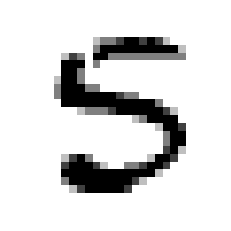

The target value is 5


In [5]:
some_digit = X_train[36001]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")

plt.show()
print("The target value is", y_train[36001])

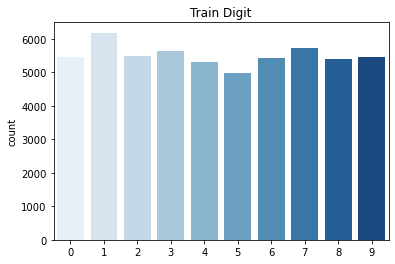

In [8]:
def dist_plot(var1, var2, var3):
    tmp_plt=sns.countplot(var1, palette="Blues").set_title(var2)
    tmp_fig = tmp_plt.get_figure()
    tmp_fig.savefig(var3 + ".png", 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25)
    return(tmp_plt)

mn_plt_trn=dist_plot(y_train, 'Train Digit', "TrainDistMNIST")
#mn_plt_trn.get_figure().show()

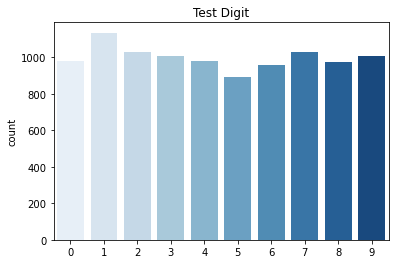

In [9]:
mn_plt_tst=dist_plot(y_test, 'Test Digit', "TestDistMNIST")
#mn_plt_tst.get_figure().show()

NameError: name 'y_pred' is not defined

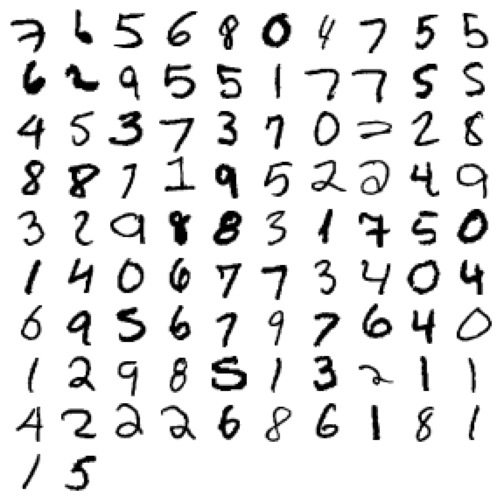

In [6]:
# additonal plots that show a number of rows

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(9,9))
example_images = np.r_[X_train[:12000:600], X_train[13000:30600:600], X_train[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

#####  Model 1 : 2 layers, 1st layers: 300 neurons, 2nd layers: 100 neurons

In [13]:
# CONSTRUCTION PHASE

# Specify the number of inputs and outputs, and set the number of hidden neurons in each layer
# Neural Network - 2 layers

n_inputs = 28*28  # MNIST features = 28 pixcels n 28 pixcels for input
n_hidden1_M1 = 300 # 300 hidden neurons in the 1st layer
n_hidden2_M1 = 100 # 100 hidden neurons in the 2nd layer
n_outputs = 10 # 10 outputs (0-9)

In [14]:
# Setup placeholder nodes to represent the training data and targets
reset_graph() #reset previous graph not to disturve the following process. 

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [15]:
# Create Neural Network　with tf.layers.dense()
with tf.name_scope("dnn"):
    hidden1_m1 = tf.layers.dense(X, n_hidden1_M1, name="hidden1_m1",
                              activation=tf.nn.relu)
    hidden2_m1 = tf.layers.dense(hidden1_m1, n_hidden2_M1, name="hidden2_m1",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2_m1, n_outputs, name="outputs")

In [16]:
# Cost function for training Neural Network
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [17]:
# Gradient Descent Optimizer to minimize the cost function by learning_rate = 0.01 
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [18]:
# Measure classification performance by in_top_k().
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [19]:
# Node to initialize all the variables
init = tf.global_variables_initializer()

In [20]:
# Create saver to save trained parameters.
saver = tf.train.Saver(save_relative_paths=True) 

In [21]:
# EXECUTION PHASE

# Set number of epochs and batch size for training model.
n_epochs = 20
batch_size = 50

In [22]:
# Record start time for neral network training
start_time_M1 = time.process_time()
#time.process_time()

In [23]:
# Create function to shuffle training data
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [24]:
#Training model by using neural network
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch_M1 = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val_M1 = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch_M1, "Val accuracy:", acc_val_M1)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.906
1 Batch accuracy: 0.92 Val accuracy: 0.927
2 Batch accuracy: 0.94 Val accuracy: 0.9348
3 Batch accuracy: 0.9 Val accuracy: 0.9402
4 Batch accuracy: 0.94 Val accuracy: 0.9438
5 Batch accuracy: 0.94 Val accuracy: 0.9482
6 Batch accuracy: 1.0 Val accuracy: 0.9532
7 Batch accuracy: 0.94 Val accuracy: 0.9584
8 Batch accuracy: 0.96 Val accuracy: 0.9606
9 Batch accuracy: 0.9 Val accuracy: 0.9614
10 Batch accuracy: 0.9 Val accuracy: 0.9632
11 Batch accuracy: 1.0 Val accuracy: 0.9648
12 Batch accuracy: 0.98 Val accuracy: 0.966
13 Batch accuracy: 0.98 Val accuracy: 0.9666
14 Batch accuracy: 1.0 Val accuracy: 0.9676
15 Batch accuracy: 0.92 Val accuracy: 0.9688
16 Batch accuracy: 1.0 Val accuracy: 0.9698
17 Batch accuracy: 1.0 Val accuracy: 0.9698
18 Batch accuracy: 0.98 Val accuracy: 0.971
19 Batch accuracy: 0.96 Val accuracy: 0.9724


In [25]:
# Make prediction by using test data
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred_M1 = np.argmax(Z, axis=1)
    accuracy_M1 = accuracy.eval(feed_dict={X: X_test, 
                                        y: y_test})
    accuracy_train_M1 = accuracy.eval(feed_dict={X: X_train, 
                                        y: y_train})

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [26]:
# Print prediction classess and actual classess.
print("-------- Model 1 --------")
print("300 neurons (1st layer), 100 neurons (2nd layer)")
print("\nPredicted classes:", y_pred_M1)
print("Actual classes:", y_test[:20])
print("Test Set Accracy:", accuracy_M1)
print("Train Set Accracy:", accuracy_train_M1)
# Record end time for neral network training
stop_time_M1 = time.process_time()

#Total processing time
runtime_M1 = stop_time_M1 - start_time_M1 

print("\nStart time:", start_time_M1)
print("Stop time:", stop_time_M1)
print("processing time:", runtime_M1)

-------- Model 1 --------
300 neurons (1st layer), 100 neurons (2nd layer)

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Test Set Accracy: 0.9704
Train Set Accracy: 0.97745454

Start time: 14.21875
Stop time: 266.328125
processing time: 252.109375


 ### Model 2 :  2 layers, 1st layers: 300 neurons, 2nd layers: 100 neurons, 10 outpus

In [22]:
# CONSTRUCTION PHASE

# Specify the number of inputs and outputs, and set the number of hidden neurons in each layer
# Neural Network - 2 layers

n_inputs = 28*28  # MNIST features = 28 pixcels n 28 pixcels for input
n_hidden1_M2 = 300 # 300 hidden neurons in the 1st layer
n_hidden2_M2 = 100 # 100 hidden neurons in the 2nd layer
n_outputs_M2 = 10 # 10 outputs (0-9)

In [23]:
reset_graph() #reset previous graph not to disturve the following process. 

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")


In [24]:
# Create Neural Network　with tf.layers.dense()
with tf.name_scope("dnn"):
    hidden1_m2 = tf.layers.dense(X, n_hidden1_M2, name="hidden1_m2",
                              activation=tf.nn.relu)
    hidden2_m2 = tf.layers.dense(hidden1_m2, n_hidden2_M2, name="hidden2_m2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2_m2, n_outputs_M2, name="outputs_m2")

In [25]:
# Cost function for training Neural Network
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [26]:
# Gradient Descent Optimizer to minimize the cost function by learning_rate = 0.01 
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [27]:
# Measure classification performance by in_top_k().
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [28]:
# Node to initialize all the variables
init = tf.global_variables_initializer()

In [29]:
# Create saver to save trained parameters.
saver = tf.train.Saver(save_relative_paths=True) 

In [30]:
# EXECUTION PHASE

# Set number of epochs and batch size for training model.
n_epochs = 20
batch_size = 50

In [31]:
# Record start time for neral network training
start_time_M2 = time.process_time()
#time.process_time()

In [32]:
# Create function to shuffle training data
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [33]:
#Training model by using neural network
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch_M2 = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val_M2 = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch_M2, "Val accuracy:", acc_val_M2)

    save_path = saver.save(sess, "./my_model2_final.ckpt")

0 Batch accuracy: 0.88 Val accuracy: 0.9042
1 Batch accuracy: 0.9 Val accuracy: 0.9234
2 Batch accuracy: 0.94 Val accuracy: 0.934
3 Batch accuracy: 0.92 Val accuracy: 0.9408
4 Batch accuracy: 0.96 Val accuracy: 0.9448
5 Batch accuracy: 0.94 Val accuracy: 0.95
6 Batch accuracy: 1.0 Val accuracy: 0.954
7 Batch accuracy: 0.94 Val accuracy: 0.9578
8 Batch accuracy: 0.96 Val accuracy: 0.9614
9 Batch accuracy: 0.92 Val accuracy: 0.9642
10 Batch accuracy: 0.94 Val accuracy: 0.9652
11 Batch accuracy: 0.98 Val accuracy: 0.9662
12 Batch accuracy: 0.98 Val accuracy: 0.9652
13 Batch accuracy: 1.0 Val accuracy: 0.97
14 Batch accuracy: 0.98 Val accuracy: 0.9722
15 Batch accuracy: 0.94 Val accuracy: 0.9726
16 Batch accuracy: 0.98 Val accuracy: 0.973
17 Batch accuracy: 1.0 Val accuracy: 0.9734
18 Batch accuracy: 1.0 Val accuracy: 0.974
19 Batch accuracy: 0.96 Val accuracy: 0.9754


In [34]:
# Make prediction by using test data
with tf.Session() as sess:
    saver.restore(sess, "./my_model2_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred_M2 = np.argmax(Z, axis=1)
    accuracy_M2 = accuracy.eval(feed_dict={X: X_test, 
                                        y: y_test})
    accuracy_train_M2 = accuracy.eval(feed_dict={X: X_train, 
                                        y: y_train})

INFO:tensorflow:Restoring parameters from ./my_model2_final.ckpt


In [36]:
# Print prediction classess and actual classess.
print("-------- Model 2 --------")
print("300 neurons (1st layer), 100 neurons (2nd layer), outputs 10")
print("\nPredicted classes:", y_pred_M2)
print("Actual classes:", y_test[:20])
print("Test Set Accracy:", accuracy_M2)
print("Train Set Accracy:", accuracy_train_M2)

# Record end time for neral network training
stop_time_M2 = time.process_time()

#Total processing time
runtime_M2 = stop_time_M2 - start_time_M2 

print("\nStart time:", start_time_M2)
print("Stop time:", stop_time_M2)
print("processing time:", runtime_M2)

-------- Model 2 --------
300 neurons (1st layer), 100 neurons (2nd layer), outputs 10

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Test Set Accracy: 0.9711
Train Set Accracy: 0.9795091

Start time: 236.953125
Stop time: 447.6875
processing time: 210.734375


##### Model 3 : 5 layers, 1st layers: 300 neurons, 2nd layers: 100 neurons, 3rd layers: 200 neurons, 4th layers: 400 neurons, 5th layers: 500 neurons,10 outpus

In [37]:
# CONSTRUCTION PHASE

# Specify the number of inputs and outputs, and set the number of hidden neurons in each layer
# Neural Network - 5 layers

n_inputs = 28*28  # MNIST features = 28 pixcels n 28 pixcels for input
n_hidden1_M3 = 300 # 300 hidden neurons in the 1st layer
n_hidden2_M3 = 100 # 200 hidden neurons in the 2nd layer
n_hidden3_M3 = 200 # 200 hidden neurons in the 3rd layer
n_hidden4_M3 = 400 # 400 hidden neurons in the 4th layer
n_hidden5_M3 = 500 # 500 hidden neurons in the 5th layer
n_outputs_M3 = 10 # 10 outputs (0-9)

In [38]:
reset_graph() #reset previous graph not to disturve the following process. 

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")


In [39]:
# Create Neural Network　with tf.layers.dense()
with tf.name_scope("dnn"):
    hidden1_m3 = tf.layers.dense(X, n_hidden1_M3, name="hidden1_m3",
                              activation=tf.nn.relu)
    hidden2_m3 = tf.layers.dense(hidden1_m3, n_hidden2_M3, name="hidden2_m3",
                              activation=tf.nn.relu)
    hidden3_m3 = tf.layers.dense(hidden2_m3, n_hidden3_M3, name="hidden3_m3",
                              activation=tf.nn.relu)
    hidden4_m3 = tf.layers.dense(hidden3_m3, n_hidden4_M3, name="hidden4_m3",
                              activation=tf.nn.relu)
    hidden5_m3 = tf.layers.dense(hidden4_m3, n_hidden5_M3, name="hidden5_m3",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden5_m3, n_outputs_M3, name="outputs_m3")

In [40]:
# Cost function for training Neural Network
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [41]:
# Gradient Descent Optimizer to minimize the cost function by learning_rate = 0.01 
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [42]:
# Measure classification performance by in_top_k().
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [43]:
# Node to initialize all the variables
init = tf.global_variables_initializer()

In [44]:
# Create saver to save trained parameters.
saver = tf.train.Saver(save_relative_paths=True) 

In [45]:
# EXECUTION PHASE

# Set number of epochs and batch size for training model.
n_epochs = 20
batch_size = 50

In [46]:
# Record start time for neral network training
start_time_M3 = time.process_time()
#time.process_time()

In [47]:
# Create function to shuffle training data
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [48]:
#Training model by using neural network
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch_M3 = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val_M3 = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch_M3, "Val accuracy:", acc_val_M3)

    save_path = saver.save(sess, "./my_model3_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.8882
1 Batch accuracy: 0.94 Val accuracy: 0.9326
2 Batch accuracy: 0.96 Val accuracy: 0.9484
3 Batch accuracy: 0.9 Val accuracy: 0.9528
4 Batch accuracy: 0.98 Val accuracy: 0.9612
5 Batch accuracy: 0.98 Val accuracy: 0.9612
6 Batch accuracy: 1.0 Val accuracy: 0.9682
7 Batch accuracy: 0.98 Val accuracy: 0.9702
8 Batch accuracy: 1.0 Val accuracy: 0.9708
9 Batch accuracy: 0.98 Val accuracy: 0.974
10 Batch accuracy: 0.98 Val accuracy: 0.975
11 Batch accuracy: 0.98 Val accuracy: 0.9766
12 Batch accuracy: 0.98 Val accuracy: 0.9704
13 Batch accuracy: 1.0 Val accuracy: 0.973
14 Batch accuracy: 1.0 Val accuracy: 0.9764
15 Batch accuracy: 0.98 Val accuracy: 0.9744
16 Batch accuracy: 1.0 Val accuracy: 0.9768
17 Batch accuracy: 1.0 Val accuracy: 0.979
18 Batch accuracy: 1.0 Val accuracy: 0.9786
19 Batch accuracy: 1.0 Val accuracy: 0.9768


In [49]:
# Make prediction by using test data
with tf.Session() as sess:
    saver.restore(sess, "./my_model3_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred_M3 = np.argmax(Z, axis=1)
    accuracy_M3 = accuracy.eval(feed_dict={X: X_test, 
                                        y: y_test})
    accuracy_train_M3 = accuracy.eval(feed_dict={X: X_train, 
                                        y: y_train})
    

INFO:tensorflow:Restoring parameters from ./my_model3_final.ckpt


In [50]:
# Print prediction classess and actual classess.
print("-------- Model 3 --------")
print("300 neurons (1st layer), 100 neurons (2nd layer),200 neurons (3rd layer),400 neurons (4th), 500 neurons (5th),10 outpus")
print("\nPredicted classes:", y_pred_M3)
print("Actual classes:", y_test[:20])
print("Test Set Accracy:", accuracy_M3)
print("Train Set Accracy:", accuracy_train_M3)
# Record end time for neral network training
stop_time_M3 = time.process_time()

#Total processing time
runtime_M3 = stop_time_M3 - start_time_M3 

print("\nStart time:", start_time_M3)
print("Stop time:", stop_time_M3)
print("processing time:", runtime_M3)

-------- Model 3 --------
300 neurons (1st layer), 100 neurons (2nd layer),200 neurons (3rd layer),400 neurons (4th), 500 neurons (5th),10 outpus

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Test Set Accracy: 0.9757
Train Set Accracy: 0.9944182

Start time: 448.296875
Stop time: 1002.21875
processing time: 553.921875


##### Model 4 : 5 layers, 1st layers: 300 neurons, 2nd layers: 100 neurons, 3rd layers: 200 neurons, 4th layers: 400 neurons, 5th layers: 500 neurons,20 outpus

In [51]:
# CONSTRUCTION PHASE

# Specify the number of inputs and outputs, and set the number of hidden neurons in each layer
# Neural Network - 5 layers

n_inputs = 28*28  # MNIST features = 28 pixcels n 28 pixcels for input
n_hidden1_M4 = 300 # 300 hidden neurons in the 1st layer
n_hidden2_M4 = 100 # 100 hidden neurons in the 2nd layer
n_hidden3_M4 = 200 # 200 hidden neurons in the 3rd layer
n_hidden4_M4 = 400 # 400 hidden neurons in the 4th layer
n_hidden5_M4 = 500 # 500 hidden neurons in the 5th layer
n_outputs_M4 = 20 # 20 outputs (0-19)

In [52]:
reset_graph() #reset previous graph not to disturve the following process. 

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")


In [53]:
# Create Neural Network　with tf.layers.dense()
with tf.name_scope("dnn"):
    hidden1_m4 = tf.layers.dense(X, n_hidden1_M4, name="hidden1_m4",
                              activation=tf.nn.relu)
    hidden2_m4 = tf.layers.dense(hidden1_m4, n_hidden2_M4, name="hidden2_m4",
                              activation=tf.nn.relu)
    hidden3_m4 = tf.layers.dense(hidden2_m4, n_hidden3_M4, name="hidden3_m4",
                              activation=tf.nn.relu)
    hidden4_m4 = tf.layers.dense(hidden3_m4, n_hidden4_M4, name="hidden4_m4",
                              activation=tf.nn.relu)
    hidden5_m4 = tf.layers.dense(hidden4_m4, n_hidden5_M4, name="hidden5_m4",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden5_m4, n_outputs_M4, name="outputs_m4")

In [54]:
# Cost function for training Neural Network
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [55]:
# Gradient Descent Optimizer to minimize the cost function by learning_rate = 0.01 
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [56]:
# Measure classification performance by in_top_k().
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [57]:
# Node to initialize all the variables
init = tf.global_variables_initializer()

In [58]:
# Create saver to save trained parameters.
saver = tf.train.Saver(save_relative_paths=True) 

In [59]:
# EXECUTION PHASE

# Set number of epochs and batch size for training model.
n_epochs = 20
batch_size = 50

In [60]:
# Record start time for neral network training
start_time_M4 = time.process_time()
#time.process_time()

In [61]:
# Create function to shuffle training data
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [62]:
#Training model by using neural network
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch_M4 = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val_M4 = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch_M4, "Val accuracy:", acc_val_M4)

    save_path = saver.save(sess, "./my_model4_final.ckpt")

0 Batch accuracy: 0.88 Val accuracy: 0.8764
1 Batch accuracy: 0.92 Val accuracy: 0.9296
2 Batch accuracy: 0.96 Val accuracy: 0.9478
3 Batch accuracy: 0.92 Val accuracy: 0.9548
4 Batch accuracy: 0.98 Val accuracy: 0.9618
5 Batch accuracy: 0.96 Val accuracy: 0.9574
6 Batch accuracy: 1.0 Val accuracy: 0.9656
7 Batch accuracy: 0.98 Val accuracy: 0.971
8 Batch accuracy: 1.0 Val accuracy: 0.9692
9 Batch accuracy: 0.96 Val accuracy: 0.9696
10 Batch accuracy: 1.0 Val accuracy: 0.9746
11 Batch accuracy: 0.98 Val accuracy: 0.9748
12 Batch accuracy: 0.98 Val accuracy: 0.9686
13 Batch accuracy: 1.0 Val accuracy: 0.9738
14 Batch accuracy: 1.0 Val accuracy: 0.976
15 Batch accuracy: 1.0 Val accuracy: 0.9758
16 Batch accuracy: 1.0 Val accuracy: 0.976
17 Batch accuracy: 1.0 Val accuracy: 0.9766
18 Batch accuracy: 1.0 Val accuracy: 0.9776
19 Batch accuracy: 1.0 Val accuracy: 0.9774


In [63]:
# Make prediction by using test data
with tf.Session() as sess:
    saver.restore(sess, "./my_model4_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred_M4 = np.argmax(Z, axis=1)
    
    accuracy_M4 = accuracy.eval(feed_dict={X: X_test, 
                                        y: y_test})
    accuracy_train_M4 = accuracy.eval(feed_dict={X: X_train, 
                                        y: y_train})

INFO:tensorflow:Restoring parameters from ./my_model4_final.ckpt


In [64]:
# Load data for the prediction
import pandas as pd
data_to_predict = pd.read_csv("test.csv") 


In [68]:
# Predict using Model 1 : 2 layers, 1st layers: 300 neurons, 2nd layers: 100 neurons
with tf.Session() as sess:
    saver.restore(sess, "./my_model4_final.ckpt") # or better, use save_path
    # X_new_scaled = data_to_predict
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred_M4 = np.argmax(Z, axis=1)
    print(y_pred_M4)
    
# prediction = pd.DataFrame(y_pred_M4, columns=['predictions']).to_csv('prediction_nn.csv')

INFO:tensorflow:Restoring parameters from ./my_model4_final.ckpt
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [70]:
# Print prediction classess and actual classess.
print("-------- Model 4 --------")
print("300 neurons (1st layer), 100 neurons (2nd layer),200 neurons (3rd layer), 400 neurons(4th layer), 500 neurons (5th layer),20 outpus")
print("\nPredicted classes:", y_pred_M4)
print("Actual classes:", y_test[:20])
print("Test Set Accracy:", accuracy_M4)
print("Train Set Accracy:", accuracy_train_M4)
# Record end time for neral network training
stop_time_M4 = time.process_time()

#Total processing time
runtime_M4 = stop_time_M4 - start_time_M4 

print("\nStart time:", start_time_M4)
print("Stop time:", stop_time_M4)
print("processing time:", runtime_M4)

-------- Model 4 --------
300 neurons (1st layer), 100 neurons (2nd layer),200 neurons (3rd layer), 400 neurons(4th layer), 500 neurons (5th layer),20 outpus

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Test Set Accracy: 0.9738
Train Set Accracy: 0.9940364

Start time: 1002.828125
Stop time: 1570.75
processing time: 567.921875


##### Tensor Flow Neural Network Benchmark Experiment Results (Tabular Format )

In [71]:
## Create Table for Tensor Flow Neural Network Benchmark Experiment Results
col_labels = ['Model', 'Number of Layers', 'Nodes per Layer', 'Processing Time','Training Set Accuracy', 'Test Set Accuracy']

table_vals = [['Model 1','2','10','228.234375','0.9704','0.97745454'],
              ['Model 2','2','20','210.734375','0.9711','0.9795091'],
              ['Model 3','5','10','553.921875','0.9757','0.9944182'],
              ['Model 4','5','20','567.921875','0.9738','0.9940364'],]

table = tabulate(table_vals, headers=col_labels, tablefmt="simple",numalign="left")
print('-------- Table for Neural Network Benchmark Experiment Results: Activation Function = ReLU\n' )
print(table) 

-------- Table for Neural Network Benchmark Experiment Results: Activation Function = ReLU

Model    Number of Layers    Nodes per Layer    Processing Time    Training Set Accuracy    Test Set Accuracy
-------  ------------------  -----------------  -----------------  -----------------------  -------------------
Model 1  2                   10                 228.234            0.9704                   0.977455
Model 2  2                   20                 210.734            0.9711                   0.979509
Model 3  5                   10                 553.922            0.9757                   0.994418
Model 4  5                   20                 567.922            0.9738                   0.994036


Management Question:
Suppose you are a financial institution evaluating machine learning technologies for optical character recognition. Initial testing is on the MNIST digits. What can you conclude from your benchmark study? Which neural network typology and hyperparameter settings would you recommend as being the most trustworthy?

#### REPORT/FINDINGS: 
(1) A summary and problem definition for management; 

(2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed 

(3) Overview of programming work; 

(4) Review of results with recommendations for management.



In this experience, I have tried 4 different neural network models. The first two models have 2 layers but the first model has 10 Nodes per layer, and the second layers has 20 nodes per layer. From first two layers, we can see that the more number of nodes per layer, the higher training and test set accuracy, and the less roceesing time. The third and fourth models have 5 layers, and the third model has 10 nodes per layer, the fourth model has 20 nodes per layer. And compare with all four models, I think the more layers of the model, the more accuracy is, the more processing time will spend. and in each layer each model, the more neurons in each layer, the more processing time will spend and the more higher accuracy is. So for a financial instituion, I would change bigger number for each neurons in each layers, and add more layers in each model. It will give us a higher accuracy prediction model.